####Import packages

In [1]:
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import Polygon
import matplotlib as mpl
import seaborn as sns
from decimal import *
import os
import math
from vis_functions import *

In [2]:
#Uniform color map for the classes (to display graphs below)
color_class = {'small_vehicle':'r', 'bus':'g', 'medium_vehicle':'b', 'large_vehicle':'c', 'double_trailer_truck':'m', 'container':'y',
'pylon':'k', 'small_aircraft':'purple', 'large_aircraft':'brown', 'small_vessel':'orange', 'medium_vessel':'pink', 'large_vessel':'olive',
               'heavy_equipment':'tab:olive'}

#Settings for charts display (below)
mpl.rcParams['font.size'] = '22'
mpl.rcParams['figure.figsize'] = [35,8]
mpl.rcParams["figure.subplot.hspace"] = 0.9
mpl.rcParams["figure.subplot.wspace"] = 0.5

##**Data Loading and preparation**

In [3]:
path_to_labelTxt = '/content/labelTxt'

In [4]:
#annotations
ann_train, list_frame_names = read_annotations(path_to_labelTxt)

FileNotFoundError: [Errno 2] No such file or directory: '/content/labelTxt'

In [15]:
#metadata
metadata = pd.read_csv('/content/metadata_train.csv')
metadata.head()

,Frame,AOI,Resolution,Sun_Elevation,Azimuth,Sun_Azimuth,Hermetic_Small_Vehicle
0,14919_7680_3840,18.0,0.566424,29.106553,216.900,80.637006,False
1,10669_11520_1280,1.0,0.550550,30.181605,148.021,263.888325,True
2,5532_6400_1280,6.0,0.906060,16.340163,227.534,281.511047,False
3,16340_7680_0,10.0,0.511862,53.173852,318.679,102.535913,True
4,13409_3840_3840,12.0,0.808492,62.278175,322.813,134.898195,True


In [16]:
#classes
class_obj = list(ann_train.category_id.unique())

##**EDA**

###**Annotations Analysis**

In [17]:
from prettytable import PrettyTable
t = PrettyTable(['Tagged frames with objects', 'Frames without any objects', 
                 'Total num annotations', 'Number of bounding boxes out of frame'])
t.add_row([ann_train.Frame.nunique(), len(list_frame_names) - ann_train.Frame.nunique(), len(ann_train), len(bb_out_of_frame(ann_train))])
print(t)

+----------------------------+----------------------------+-----------------------+---------------------------------------+
| Tagged frames with objects | Frames without any objects | Total num annotations | Number of bounding boxes out of frame |
+----------------------------+----------------------------+-----------------------+---------------------------------------+
|            1080            |            377             |         18113         |                  710                  |
+----------------------------+----------------------------+-----------------------+---------------------------------------+


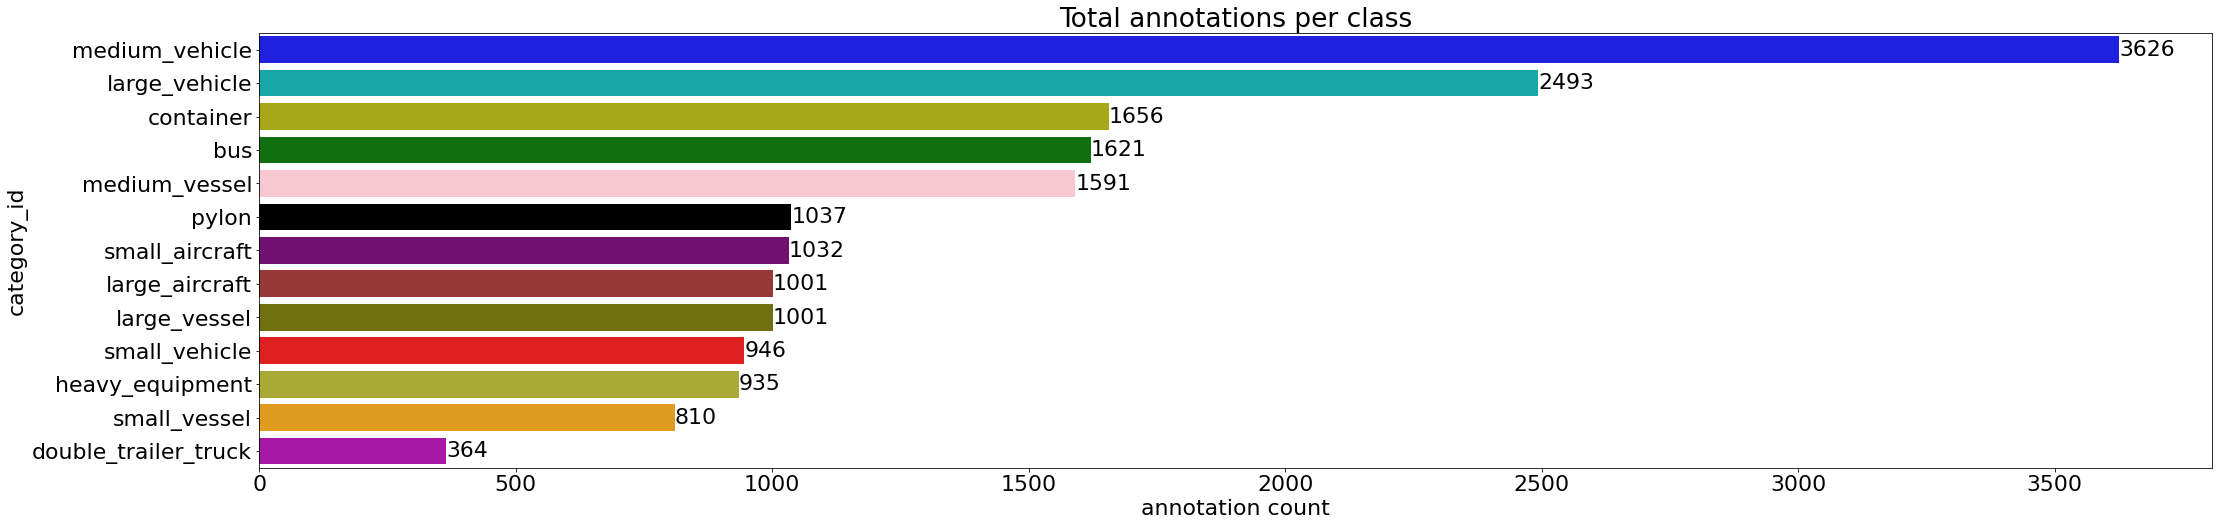

In [18]:
anno_vis_bar(ann_train)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


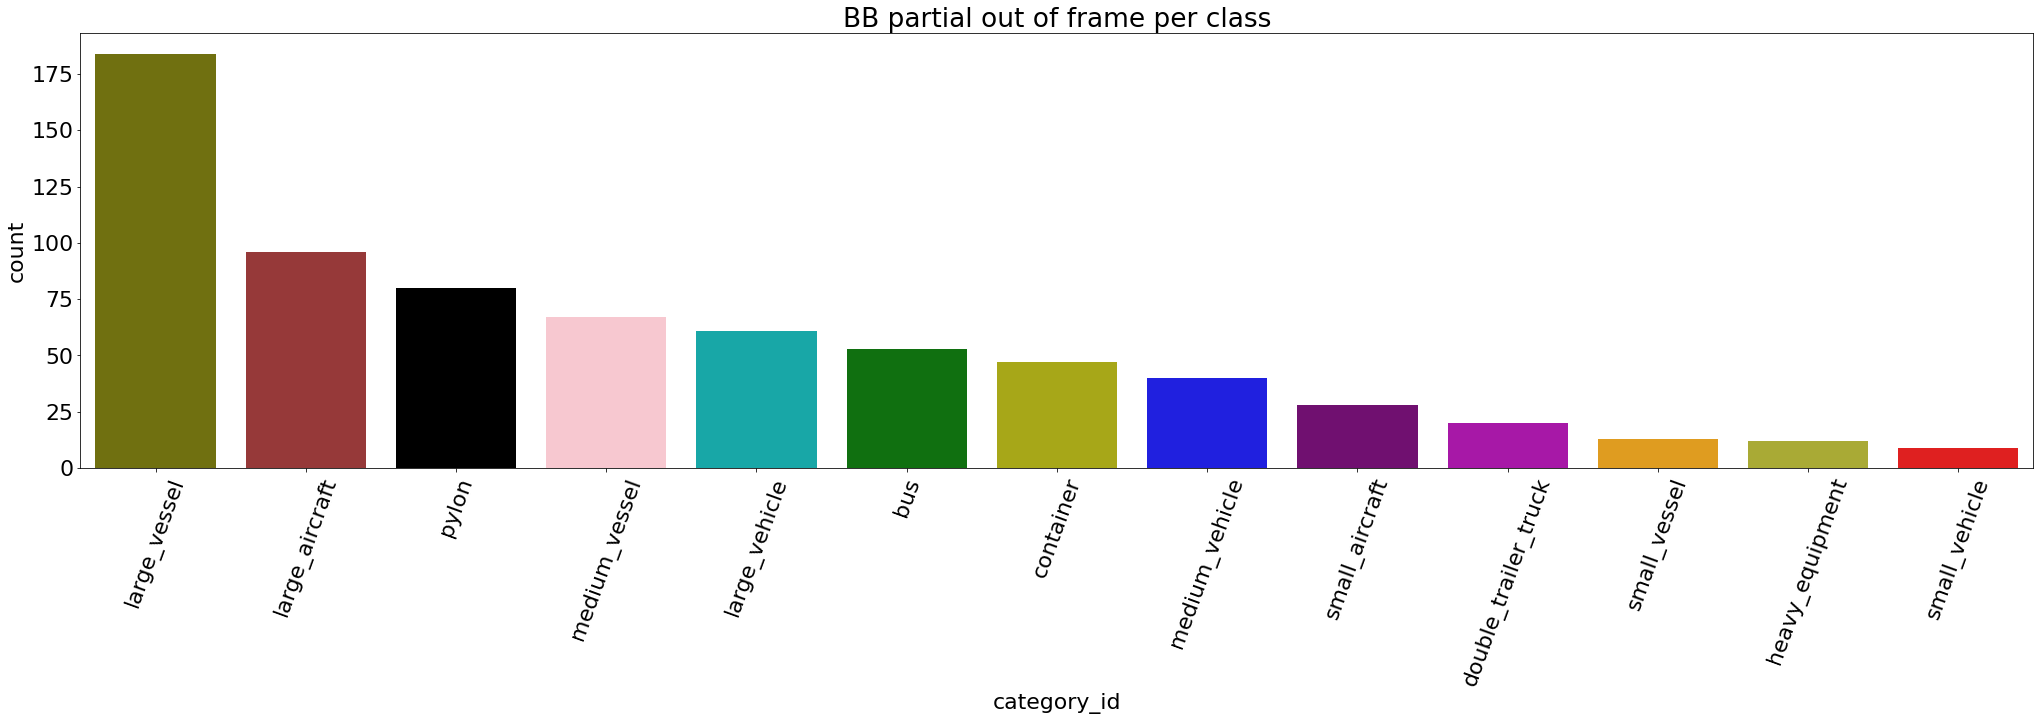

In [19]:
anno_bb_out_of_frame_vis_bar(ann_train)

'An example for chart clarification: \nin the double trailer truck histogram, there are about 26 frames with one double trailer,\n10 frames with two double trailer,four frames with three double trailers, and on.'

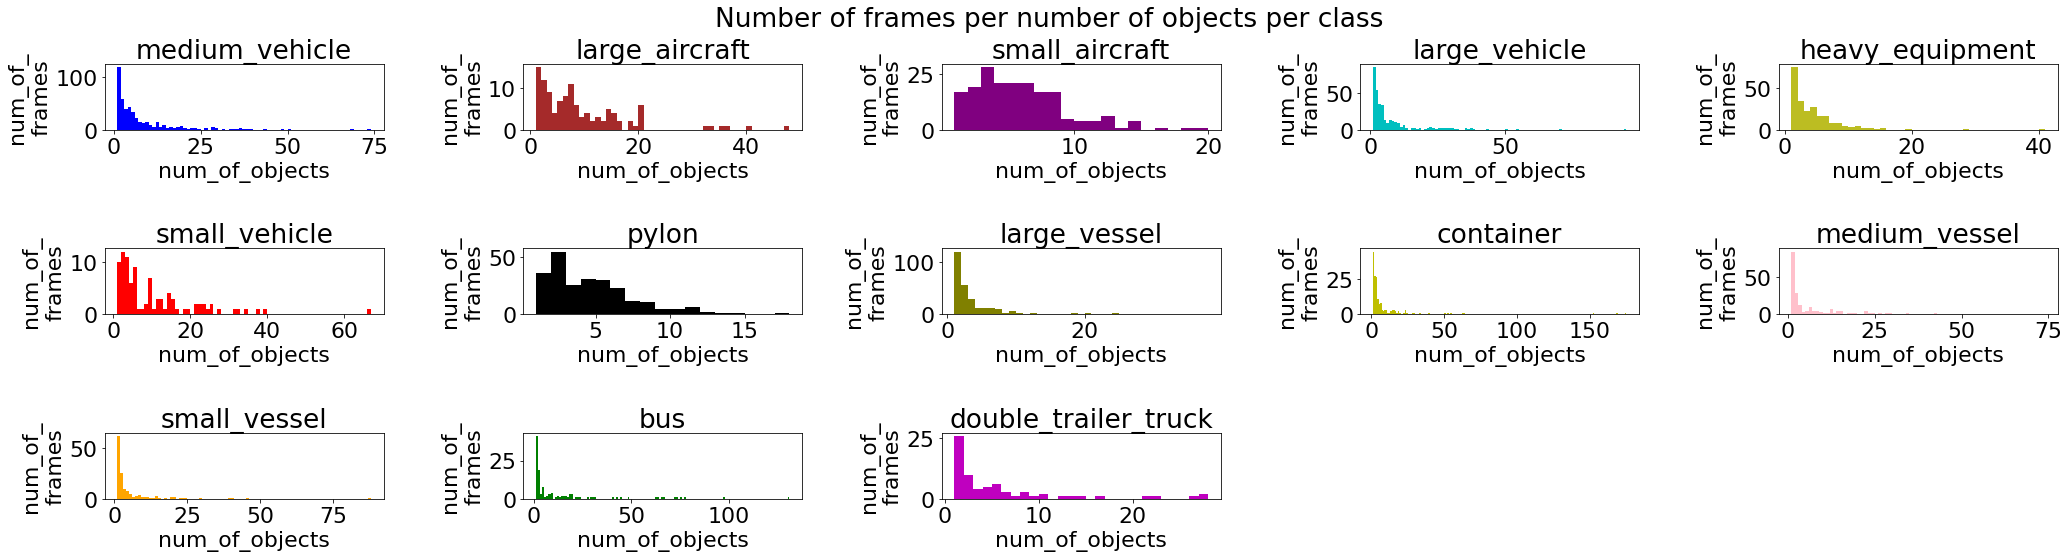

In [20]:
class_per_img_hist(ann_train, class_obj)

"""An example for chart clarification: 
in the double trailer truck histogram, there are about 26 frames with one double trailer,
10 frames with two double trailer,four frames with three double trailers, and on."""

###**Metadata Analysis**

####**Frames Analysis**

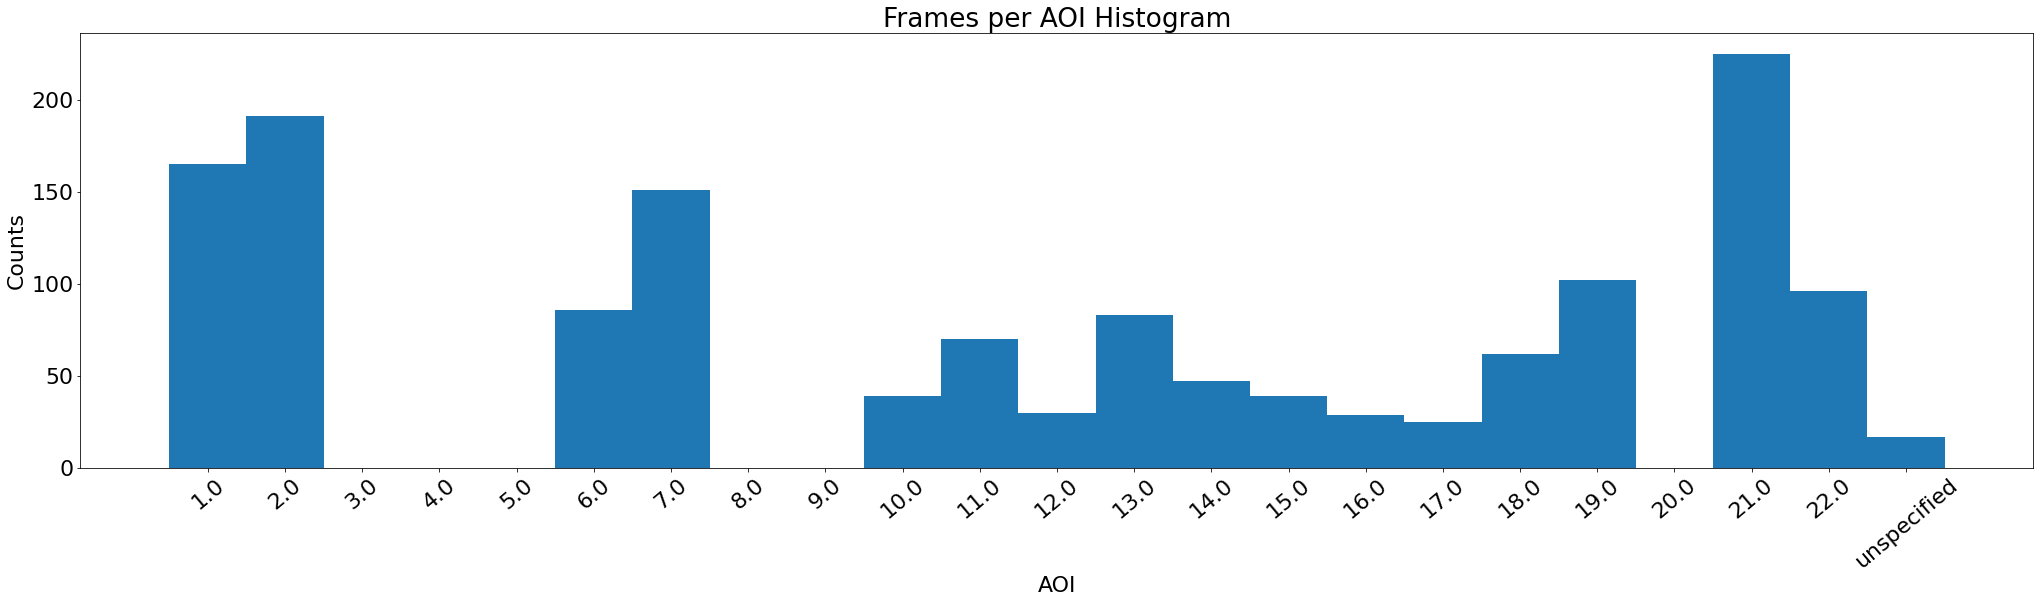

In [21]:
hist_features(metadata, 'AOI', 1)

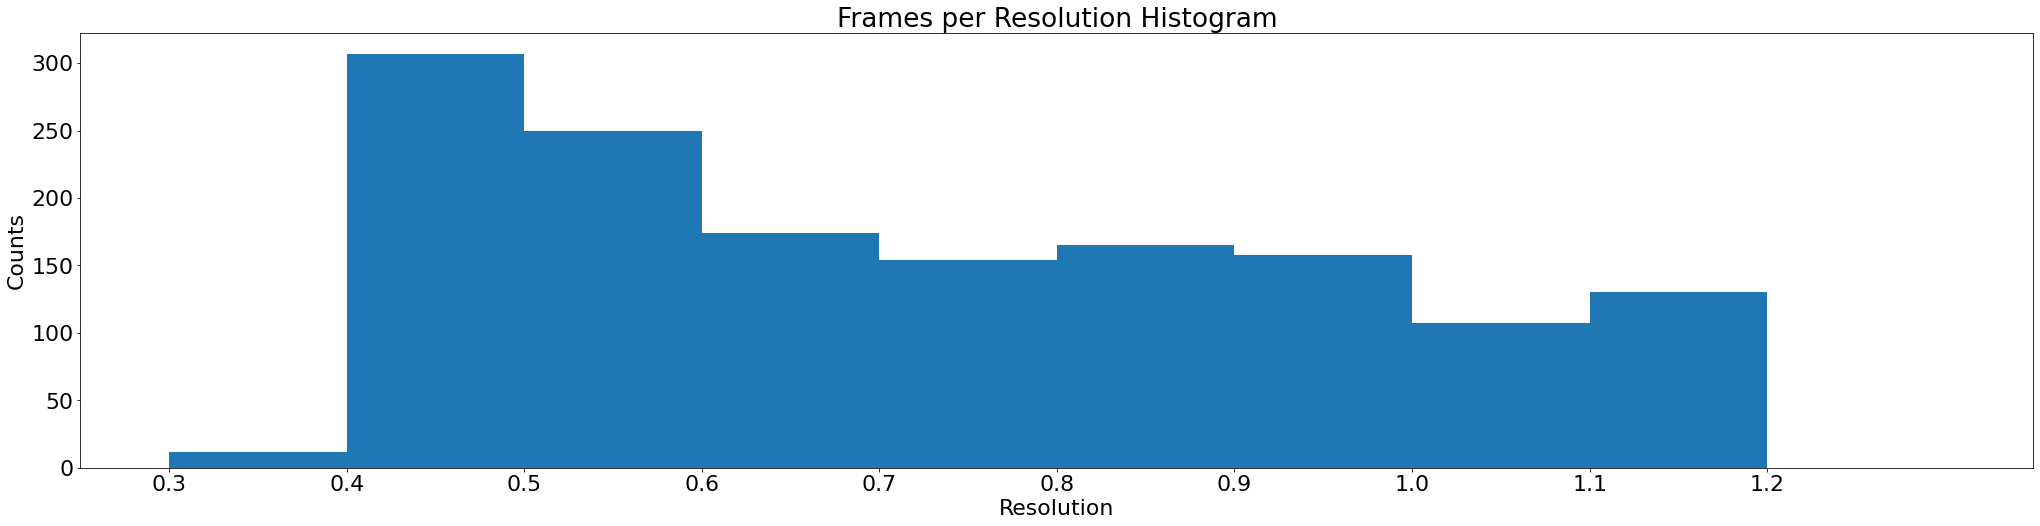

In [22]:
hist_features(metadata, 'Resolution', 0.1)

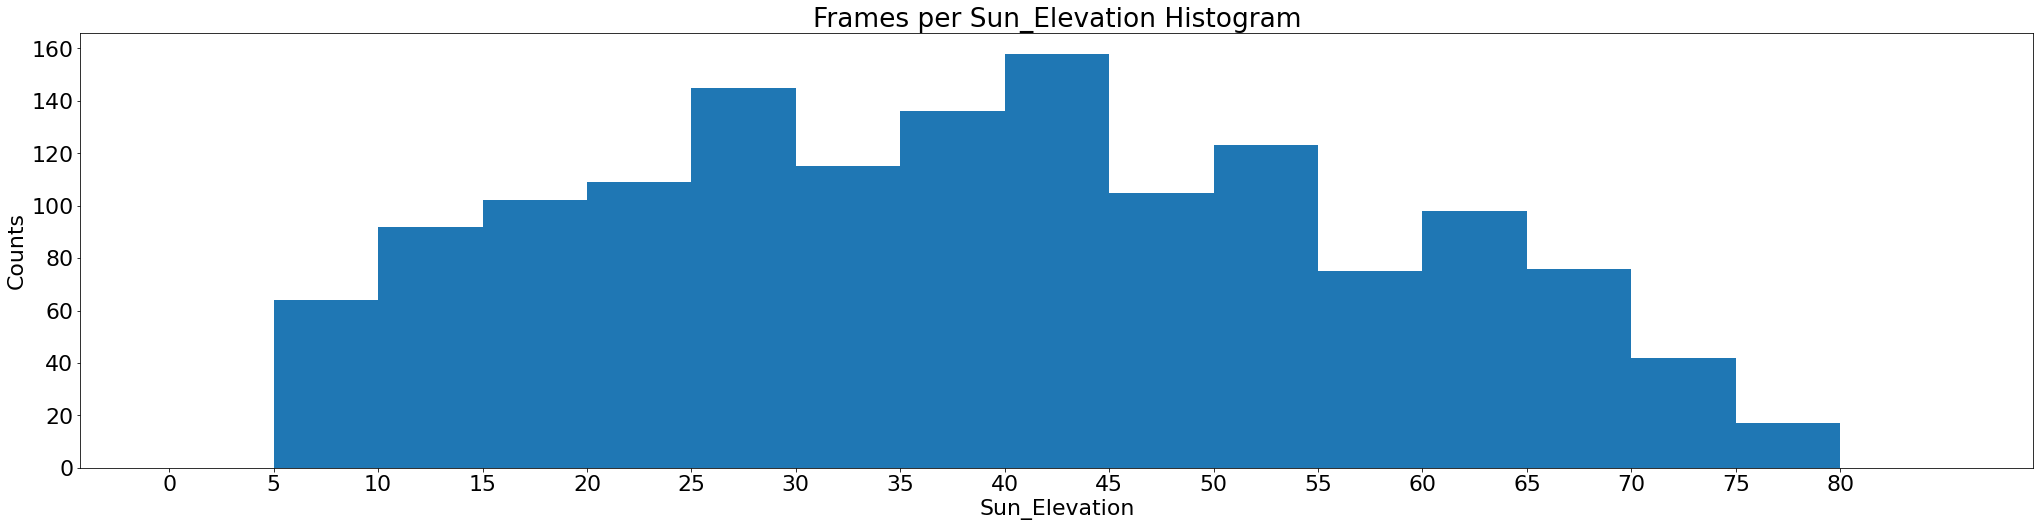

In [23]:
hist_features(metadata, 'Sun_Elevation', 5)

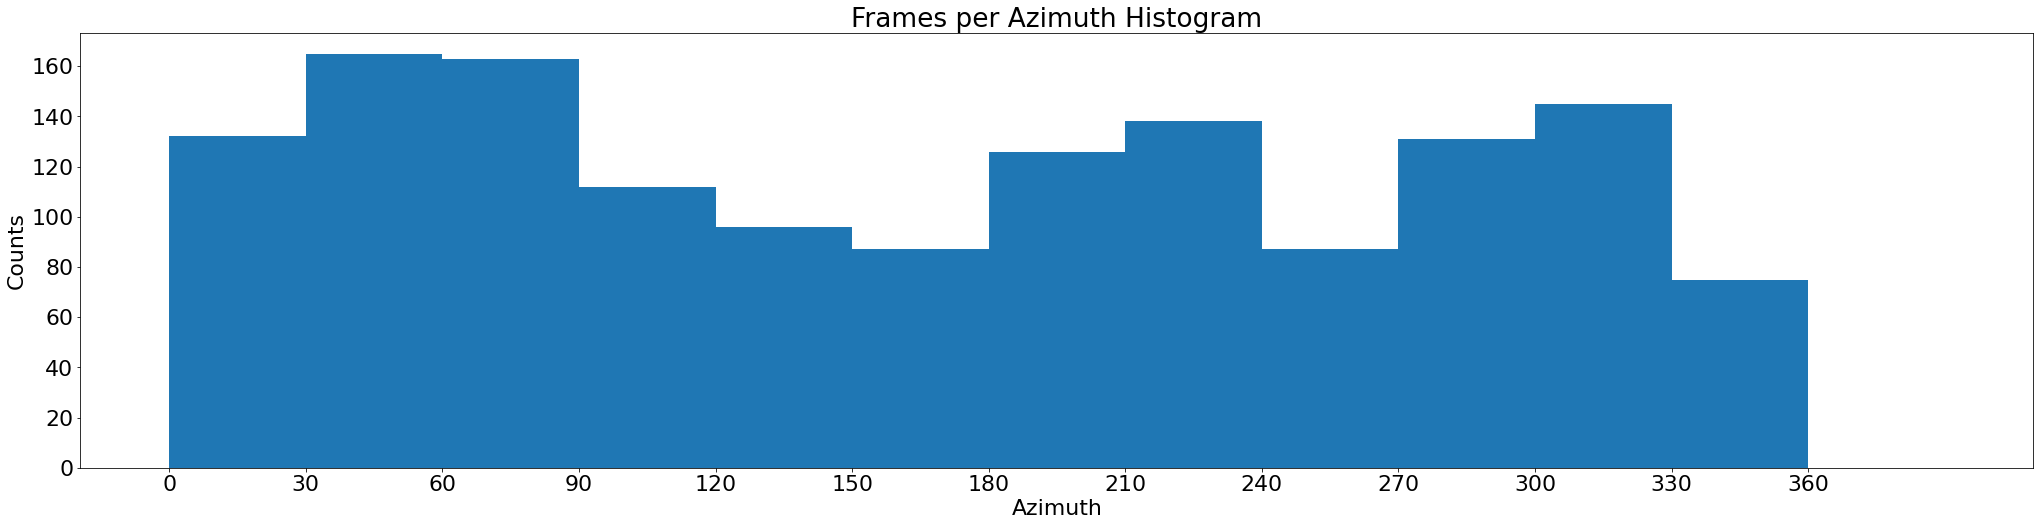

In [24]:
hist_features(metadata, 'Azimuth', 30)

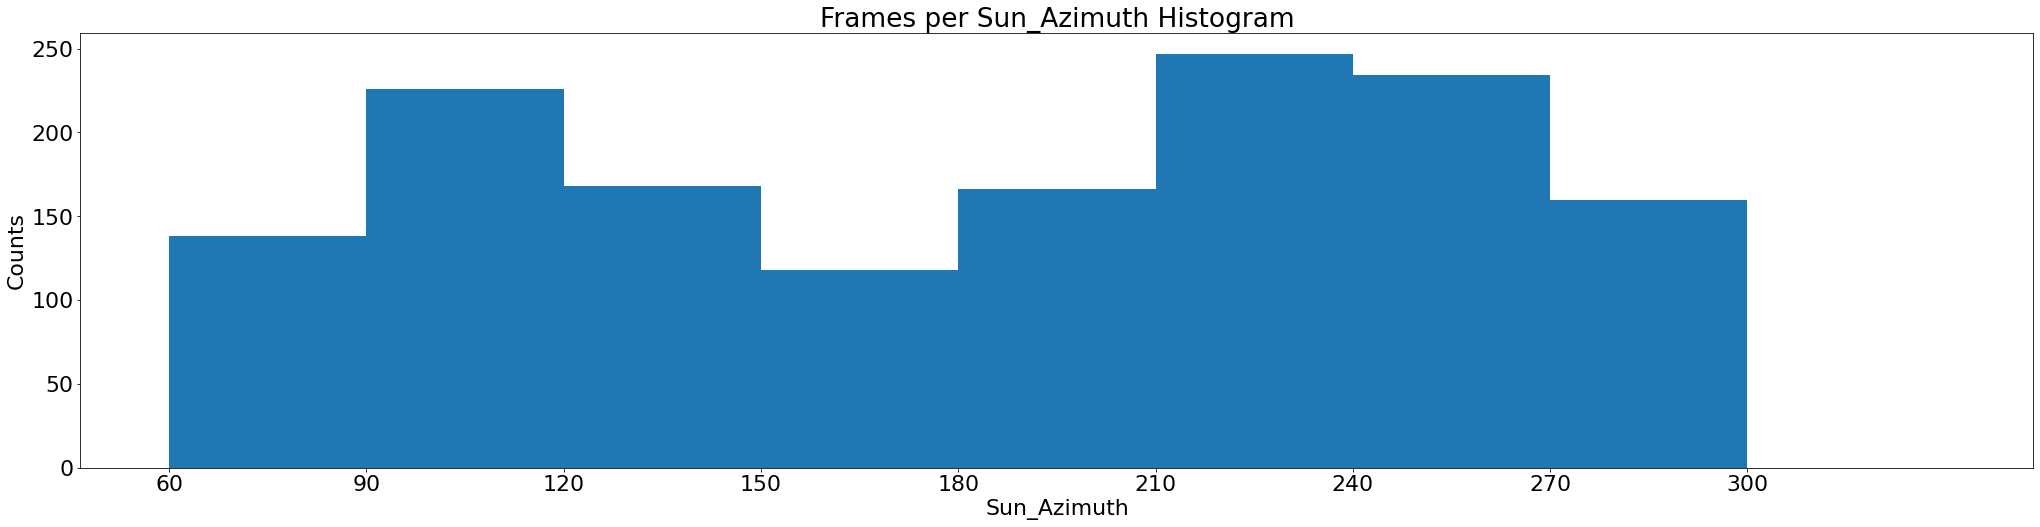

In [25]:
hist_features(metadata, 'Sun_Azimuth', 30)

####**AOI Analysis**

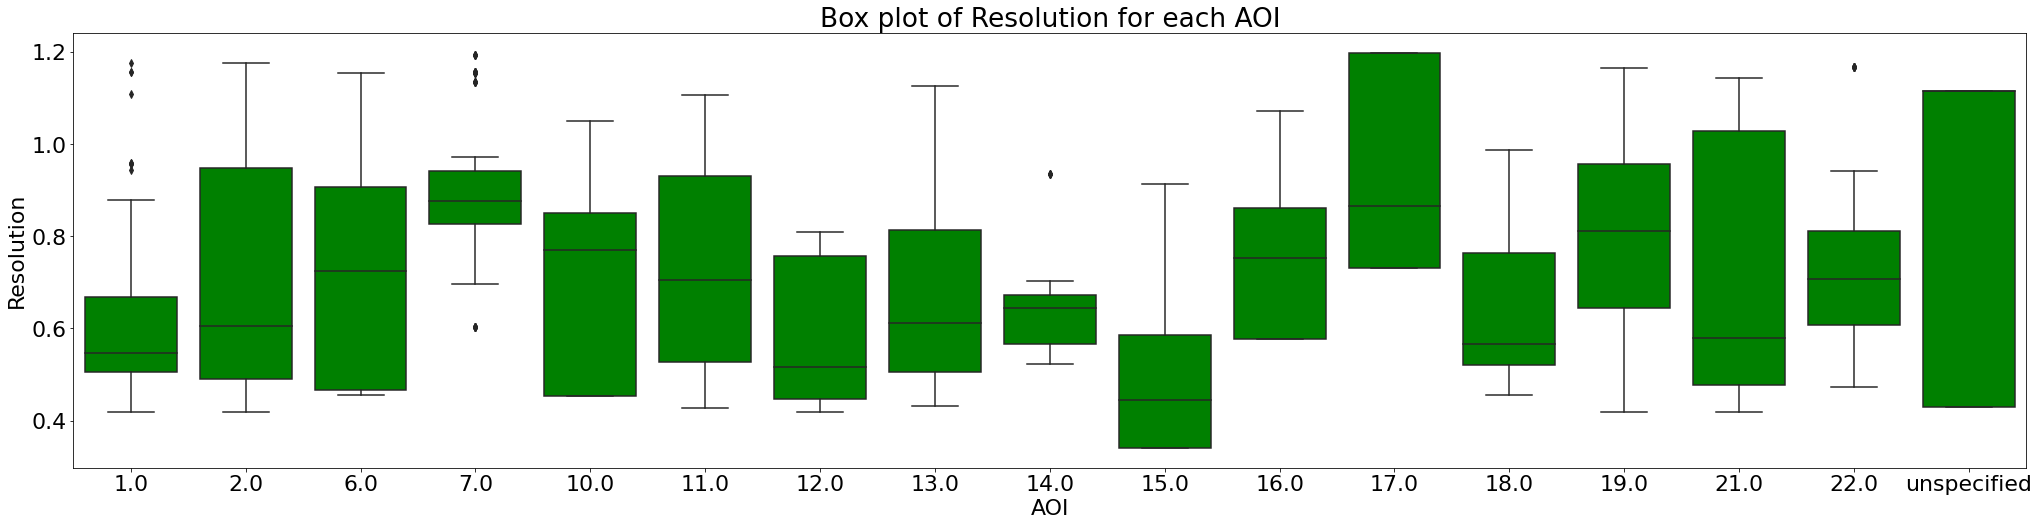

In [26]:
box_plot_aoi(metadata, 'Resolution')

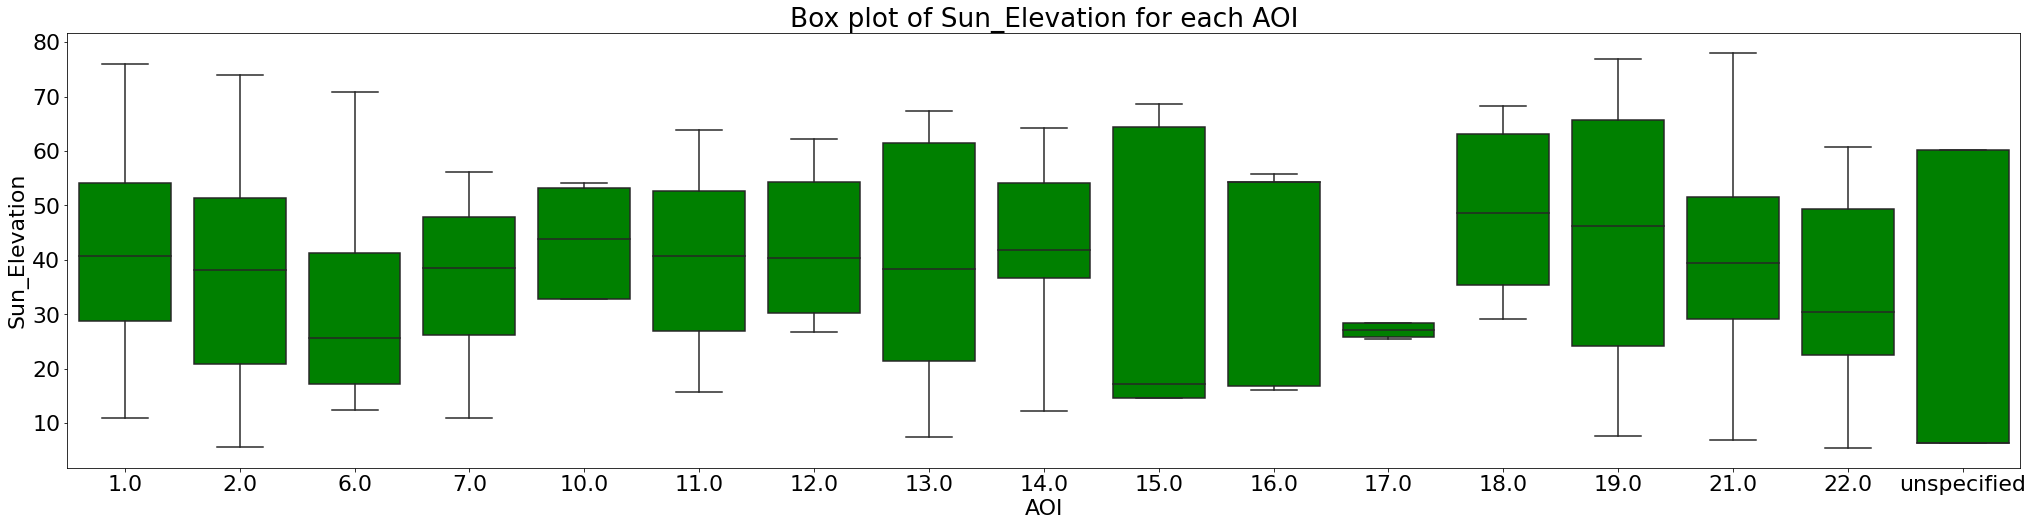

In [27]:
box_plot_aoi(metadata, 'Sun_Elevation')

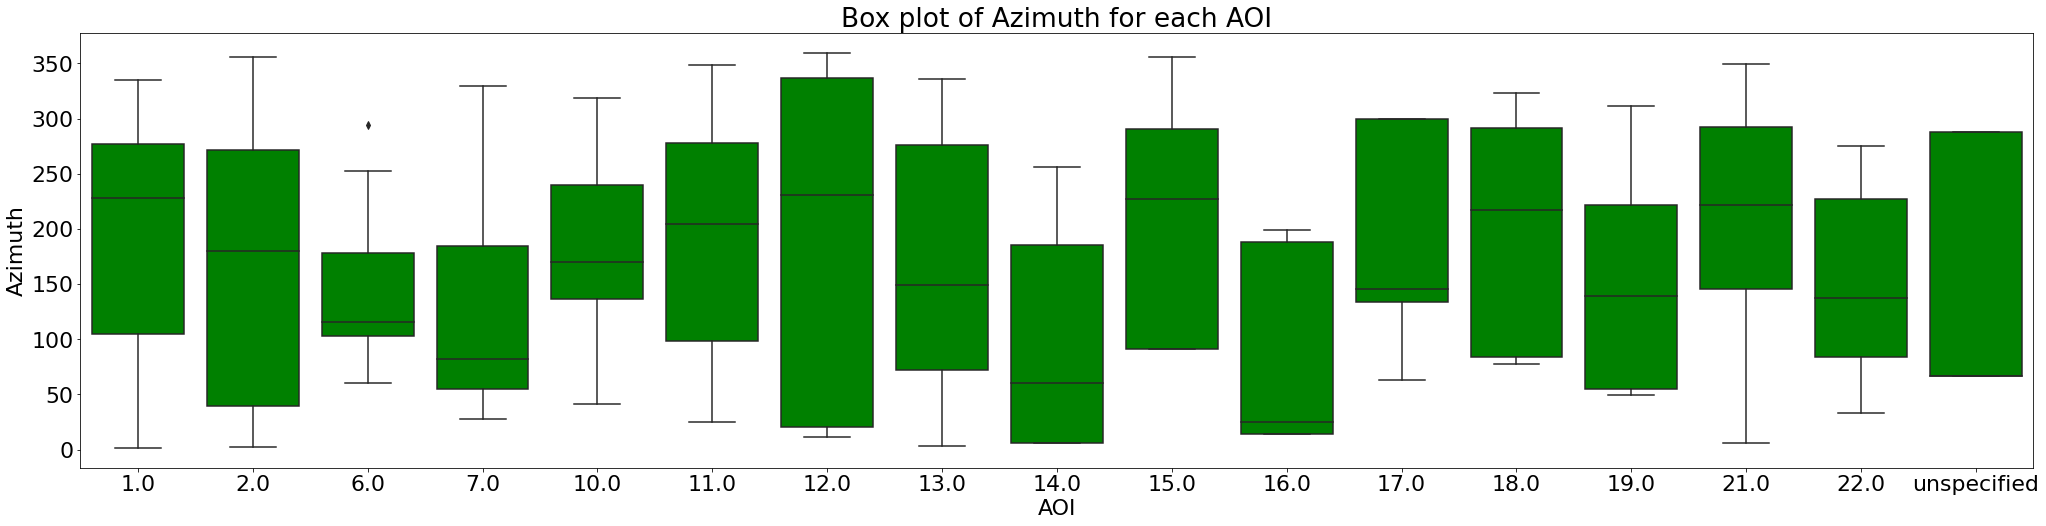

In [28]:
box_plot_aoi(metadata, 'Azimuth')

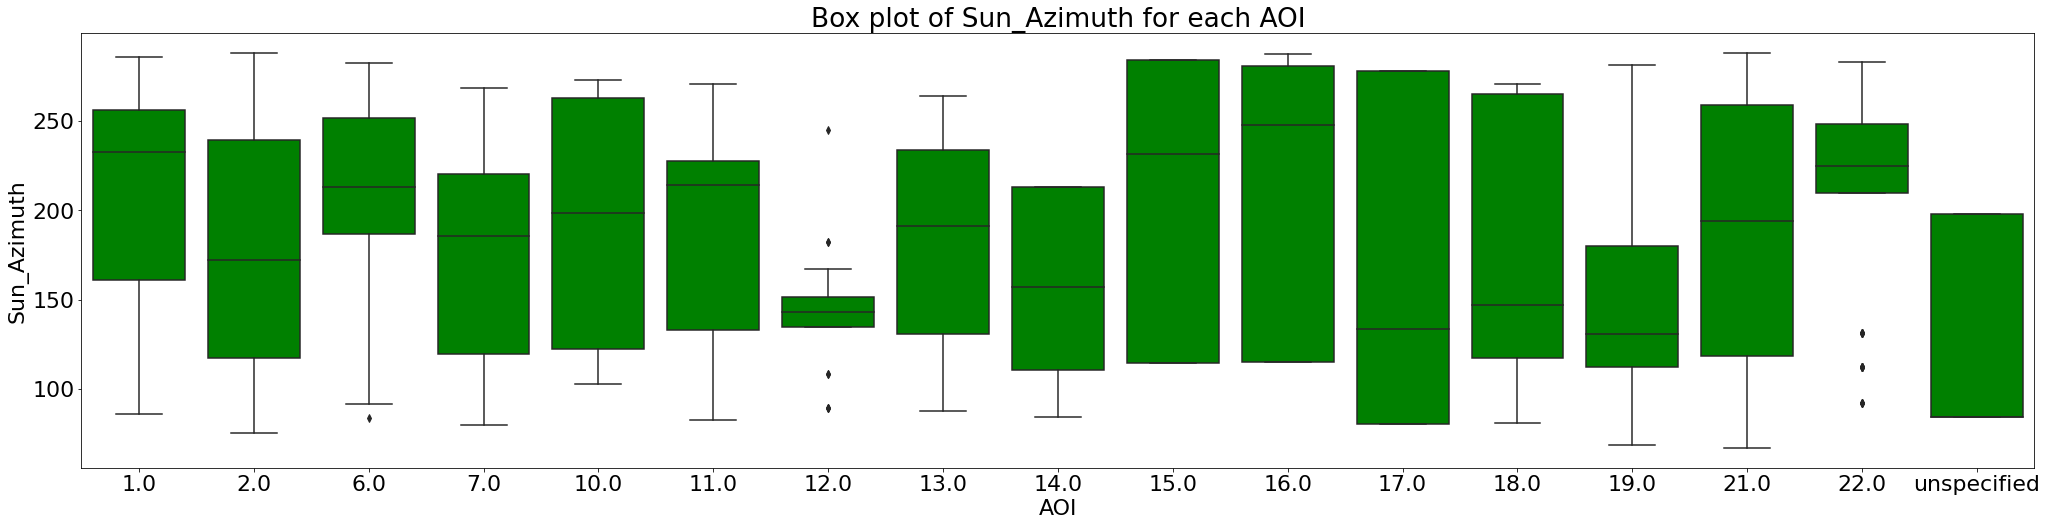

In [29]:
box_plot_aoi(metadata, 'Sun_Azimuth')

####**Classes Analysis**

In [30]:
ann_train = ann_train.merge(metadata, how='left', on='Frame')

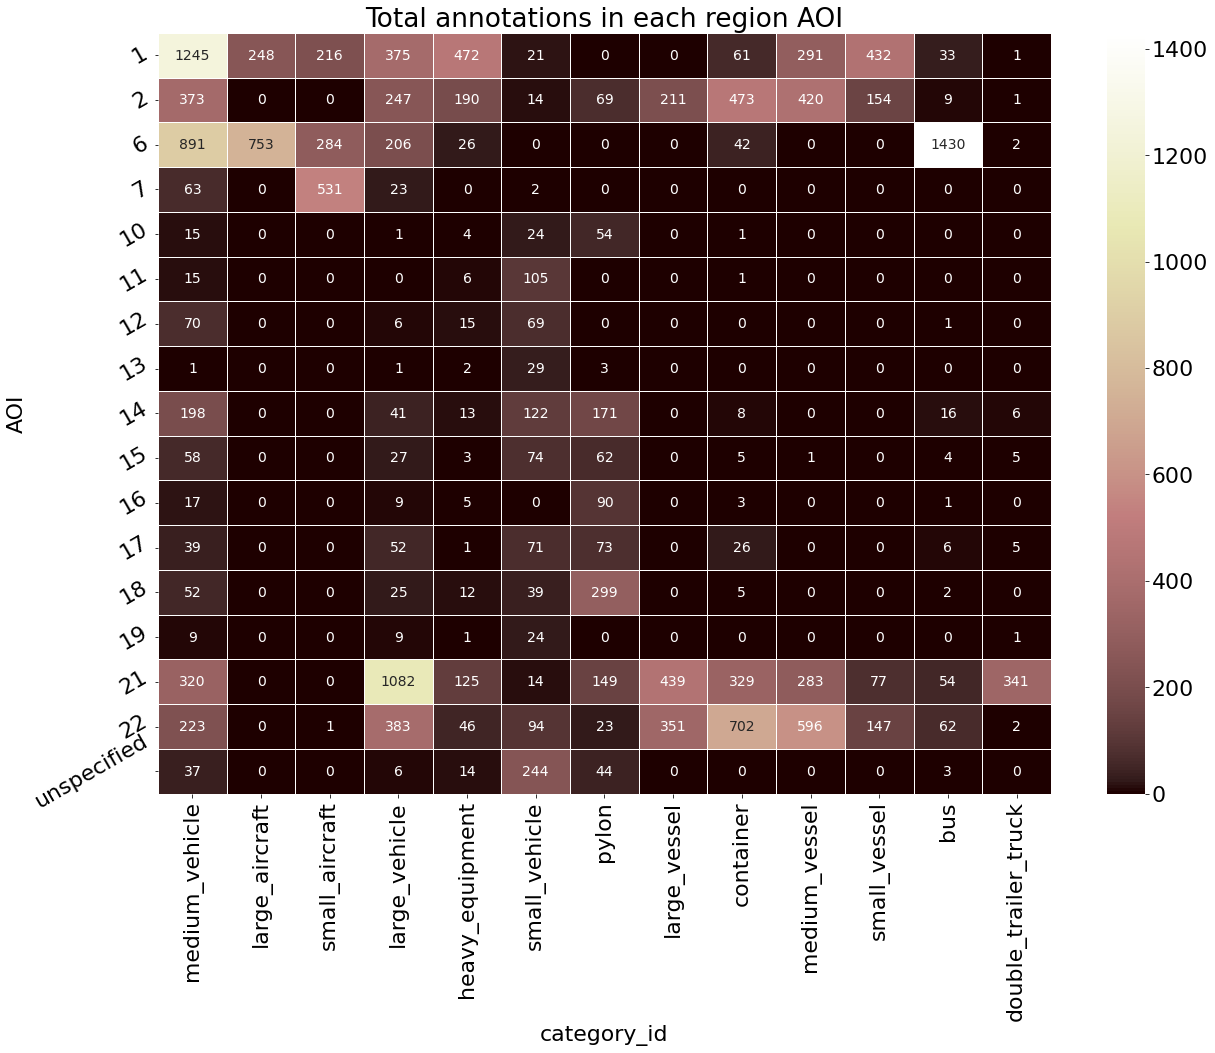

In [31]:
total_ann_heatmap(ann_train, class_obj)

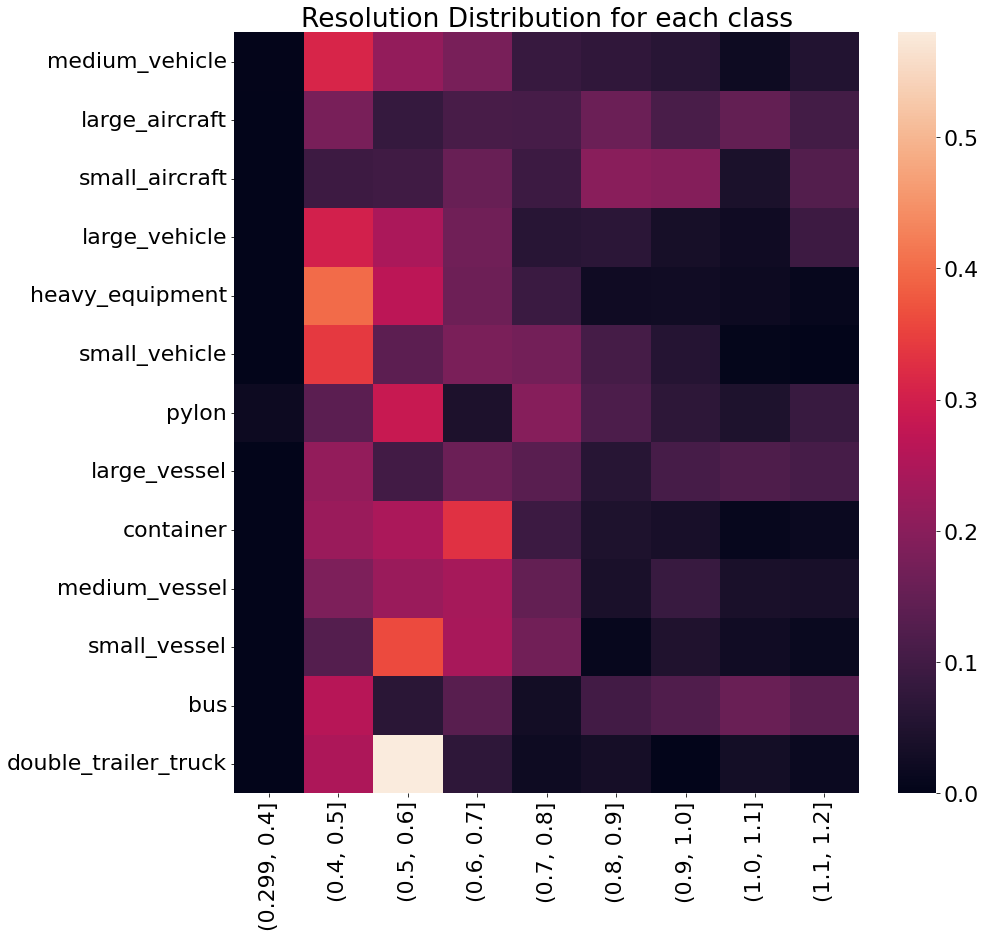

In [32]:
heatmap_res(ann_train[['category_id', 'Resolution']], class_obj)

##**Frame and annotations display**

Please write the frame's full name, without the ending '.tiff'

In [201]:
frame_to_show = "5532_6400_1280" #@param {type:"string"}

In [7]:
ann_frame = ann_train[ann_train.Frame == frame_to_show]
frame_path = f"/content/images/{frame_to_show}.tiff"
frame_with_annotation(frame_path, ann_frame)

NameError: name 'ann_train' is not defined

In [ ]:
show_frames_by_AOI(ann_train)

In [ ]:
show_frames_by_AOI(ann_train, 'Azimuth')